In [1]:
from magnetic_field import *
from utils import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

exact_value = -8.56677223
bn_list = create_bn_list(7)

In [2]:
def get_csv(results):
    for result in results:
        if result == None:
            continue
        print("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s" % (result["method"], result["depth"], result["t_type"], result["t_min"], result["t_max"], result["cost"]["min"], result["cost"]["max"], result["cost"]["mean"], result["cost"]["std"], result["iter"]["min"], result["iter"]["max"], result["iter"]["mean"], result["iter"]["std"]))

def run(method, nqubit, depth_list, t_type, t_min, t_max):
    results = []
    for depth in depth_list:
        result = getResultByTime(nqubit, depth, method, t_type, t_min, t_max)
        if result == None:
            continue
        results.append(result)
    return results

In [12]:
vqe_results = []
nqubit = 7
method = 'indirect_xy'
depth_list = [12,16,20,24]
vqe_results.extend(run(method, nqubit, depth_list, 'random', 0, 1))
vqe_results.extend(run(method, nqubit, depth_list, 'random', 0, 2))
vqe_results.extend(run(method, nqubit, depth_list, 'random', 0, 3))
vqe_results.extend(run(method, nqubit, depth_list, 'random', -1, 1))
vqe_results.extend(run(method, nqubit, depth_list, 'random', -2, 2))
vqe_results.extend(run(method, nqubit, depth_list, 'random', -10, 10))

get_csv(vqe_results)

indirect_xy,12,random,0,1,-7.604163202818393,-6.191772767134584,-7.016794960659015,0.4141160337482123,5863.0,38559.0,15538.5,9205.911951023647
indirect_xy,12,random,0,2,-8.031592447410617,-7.119521868084644,-7.6425840918178904,0.2831025358143701,8056.0,22893.0,13646.4,5169.087911808039
indirect_xy,16,random,0,2,-8.294818728070775,-7.2776155531089834,-7.978272247920643,0.35147282987257666,16062.0,42483.0,26568.3,7942.907377654607
indirect_xy,20,random,0,2,-8.403089036605621,-7.378876131007761,-8.003819717183926,0.31948045889298554,20596.0,102128.0,46924.0,24165.99718199106
indirect_xy,24,random,0,2,-8.41311008509324,-7.856094601781748,-8.176915936133778,0.19843712517376608,18041.0,61257.0,42771.7,12728.345179558888
indirect_xy,12,random,0,3,-8.228365304246797,-6.9593021793211784,-7.692280186168652,0.40466349173908717,7125.0,25210.0,12424.8,4965.6073505664945
indirect_xy,16,random,0,3,-8.2516165951299,-6.653298813099645,-7.796915699223947,0.48050501721167016,9984.0,49142.0,22478.0,11494.

In [13]:
## x axis: layer, y axis: expectation value
plot_list = {}
for result in vqe_results:
    if result['t_type'] == 'random':
        if ("%s-t-%sto%s-depth" % (result['method'], result['t_min'], result['t_max'])) not in plot_list.keys():
            plot_list["%s-t-%sto%s-depth" % (result['method'], result['t_min'], result['t_max'])] = [result['depth']]
            plot_list["%s-t-%sto%s-cost-min" % (result['method'], result['t_min'], result['t_max'])] = [result['cost']['min']]
            plot_list["%s-t-%sto%s-cost-mean" % (result['method'], result['t_min'], result['t_max'])] = [result['cost']['mean']]
            plot_list["%s-t-%sto%s-iter-min" % (result['method'], result['t_min'], result['t_max'])] = [result['iter']['min']]
            plot_list["%s-t-%sto%s-iter-max" % (result['method'], result['t_min'], result['t_max'])] = [result['iter']['max']]
            plot_list["%s-t-%sto%s-iter-mean" % (result['method'], result['t_min'], result['t_max'])] = [result['iter']['mean']]
        else:
            plot_list["%s-t-%sto%s-depth" % (result['method'], result['t_min'], result['t_max'])].append(result['depth'])
            plot_list["%s-t-%sto%s-cost-min" % (result['method'], result['t_min'], result['t_max'])].append(result['cost']['min'])
            plot_list["%s-t-%sto%s-cost-mean" % (result['method'], result['t_min'], result['t_max'])].append(result['cost']['mean'])
            plot_list["%s-t-%sto%s-iter-min" % (result['method'], result['t_min'], result['t_max'])].append(result['iter']['min'])
            plot_list["%s-t-%sto%s-iter-max" % (result['method'], result['t_min'], result['t_max'])].append(result['iter']['max'])
            plot_list["%s-t-%sto%s-iter-mean" % (result['method'], result['t_min'], result['t_max'])].append(result['iter']['mean'])

def create_expectation_graph(title, y_min=-9.0, y_max=-5.0):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("expectation value")
    plt.ylim(y_min, y_max)

def create_iteration_graph(title):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("iteration")

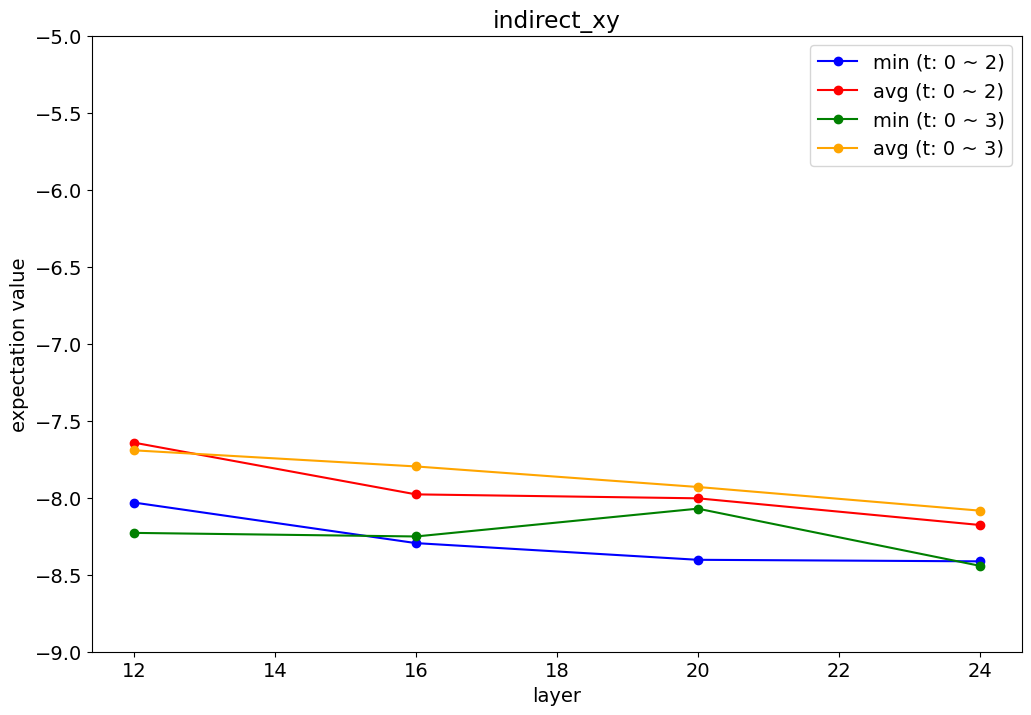

In [14]:
create_expectation_graph("indirect_xy")
# plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xy-t-0to2-depth'], plot_list['indirect_xy-t-0to2-cost-min'], marker='o', color='blue', label='min (t: 0 ~ 2)')
plt.plot(plot_list['indirect_xy-t-0to2-depth'], plot_list['indirect_xy-t-0to2-cost-mean'], marker='o', color='red', label='avg (t: 0 ~ 2)')
plt.plot(plot_list['indirect_xy-t-0to3-depth'], plot_list['indirect_xy-t-0to3-cost-min'], marker='o', color='green', label='min (t: 0 ~ 3)')
plt.plot(plot_list['indirect_xy-t-0to3-depth'], plot_list['indirect_xy-t-0to3-cost-mean'], marker='o', color='orange', label='avg (t: 0 ~ 3)')
plt.legend()
# plt.savefig('image/direct_energy.png')

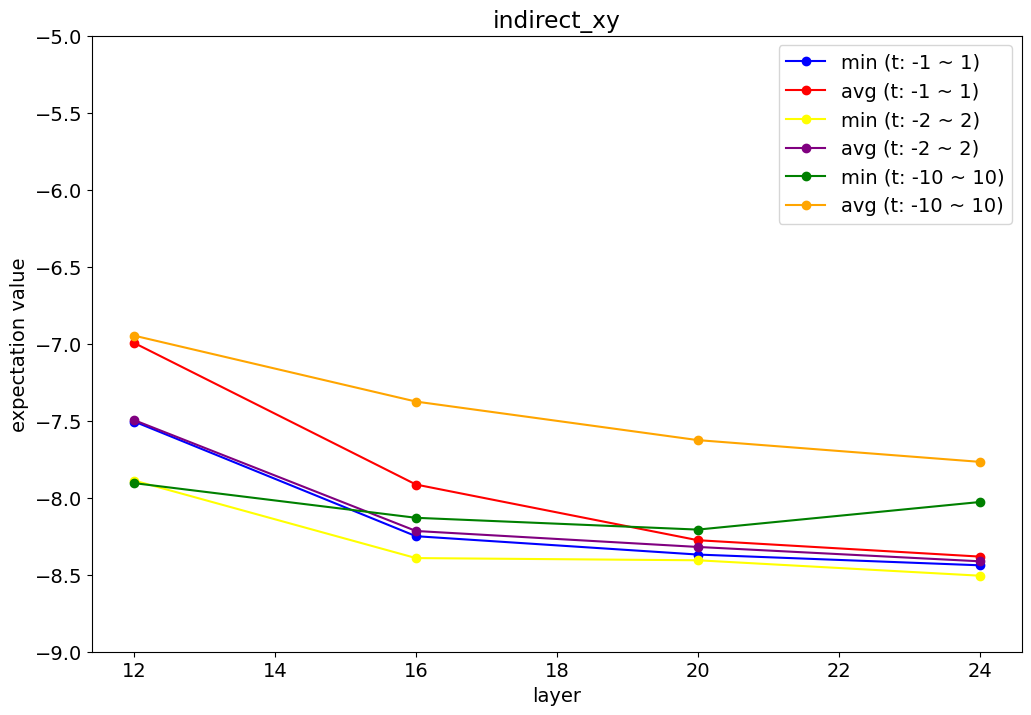

In [19]:
create_expectation_graph("indirect_xy")
plt.plot(plot_list['indirect_xy-t--1to1-depth'], plot_list['indirect_xy-t--1to1-cost-min'], marker='o', color='blue', label='min (t: -1 ~ 1)')
plt.plot(plot_list['indirect_xy-t--1to1-depth'], plot_list['indirect_xy-t--1to1-cost-mean'], marker='o', color='red', label='avg (t: -1 ~ 1)')
plt.plot(plot_list['indirect_xy-t--2to2-depth'], plot_list['indirect_xy-t--2to2-cost-min'], marker='o', color='yellow', label='min (t: -2 ~ 2)')
plt.plot(plot_list['indirect_xy-t--2to2-depth'], plot_list['indirect_xy-t--2to2-cost-mean'], marker='o', color='purple', label='avg (t: -2 ~ 2)')
# plt.plot(plot_list['indirect_xy-t--3to3-depth'], plot_list['indirect_xy-t--3to3-cost-min'], marker='o', color='yellow', label='min (t: -3 ~ 3)')
# plt.plot(plot_list['indirect_xy-t--3to3-depth'], plot_list['indirect_xy-t--3to3-cost-mean'], marker='o', color='purple', label='avg (t: -3 ~ 3)')
plt.plot(plot_list['indirect_xy-t--10to10-depth'], plot_list['indirect_xy-t--10to10-cost-min'], marker='o', color='green', label='min (t: -10 ~ 10)')
plt.plot(plot_list['indirect_xy-t--10to10-depth'], plot_list['indirect_xy-t--10to10-cost-mean'], marker='o', color='orange', label='avg (t: -10 ~ 10)')
plt.legend()
# plt.savefig('image/direct_energy.png')
